#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from matplotlib import colors

#Importing Dataset

In [ ]:
ad=pd.read_csv("/content/drive/Shareddrives/Study/SEM 2/IT608 Machine Learning/Project/advertising.csv")
ad.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


We have 9 features and 1000 observations.

#Pre-Processing the dataset

In [ ]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


There are no null values in the dataset.

"Ad Topic Line", "City", and "Country" are categorical columns.

In [ ]:
categorical_variables = ['Ad Topic Line', 'City', 'Country']
ad[categorical_variables].describe(include=['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Synergistic fresh-thinking array,Lisamouth,France
freq,1,3,9


In [ ]:
pd.crosstab(index=ad['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


Since there are 1000 unique "Ad Topic Lines" and 969 unique cities, it is evident that they will provide negligible contribution in predicting whether a person will click on the ad. Also, in the "Country" column, the highest frequency of a country is only 9 out of 1000 observations.So the "Country" column will also not be of much use in our predictions. Hence, we can drop these columns.

In [ ]:
ad=ad.drop(['Ad Topic Line', 'City', 'Country'], axis=1) #Dropping the columns
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0


In [ ]:
#Splitting the "Timestamp" column to Month, Date, Week and Hour
ad['Timestamp'] = pd.to_datetime(ad['Timestamp'])

ad['Month'] = ad['Timestamp'].dt.month
ad['Day of the month'] = ad['Timestamp'].dt.day
ad["Day of the week"] = ad['Timestamp'].dt.dayofweek
ad['Hour'] = ad['Timestamp'].dt.hour
ad = ad.drop(['Timestamp'], axis=1)

ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [ ]:
ad.groupby('Clicked on Ad').count()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day of the month,Day of the week,Hour
Clicked on Ad,,,,,,,,,
0,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500


#Visualizing the data

In [ ]:
corr = ad.corr()
corr.shape

(10, 10)

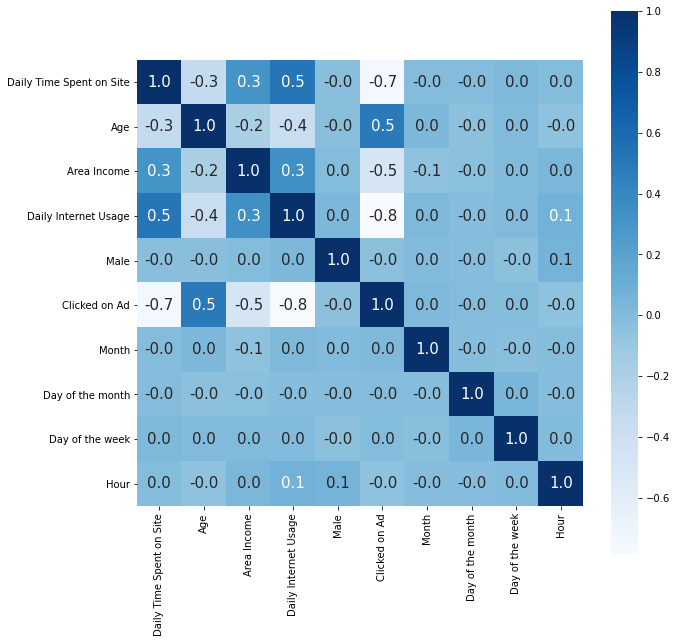

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')
plt.show()

In [ ]:
sns.set_style('white')
sns.set_context('notebook')

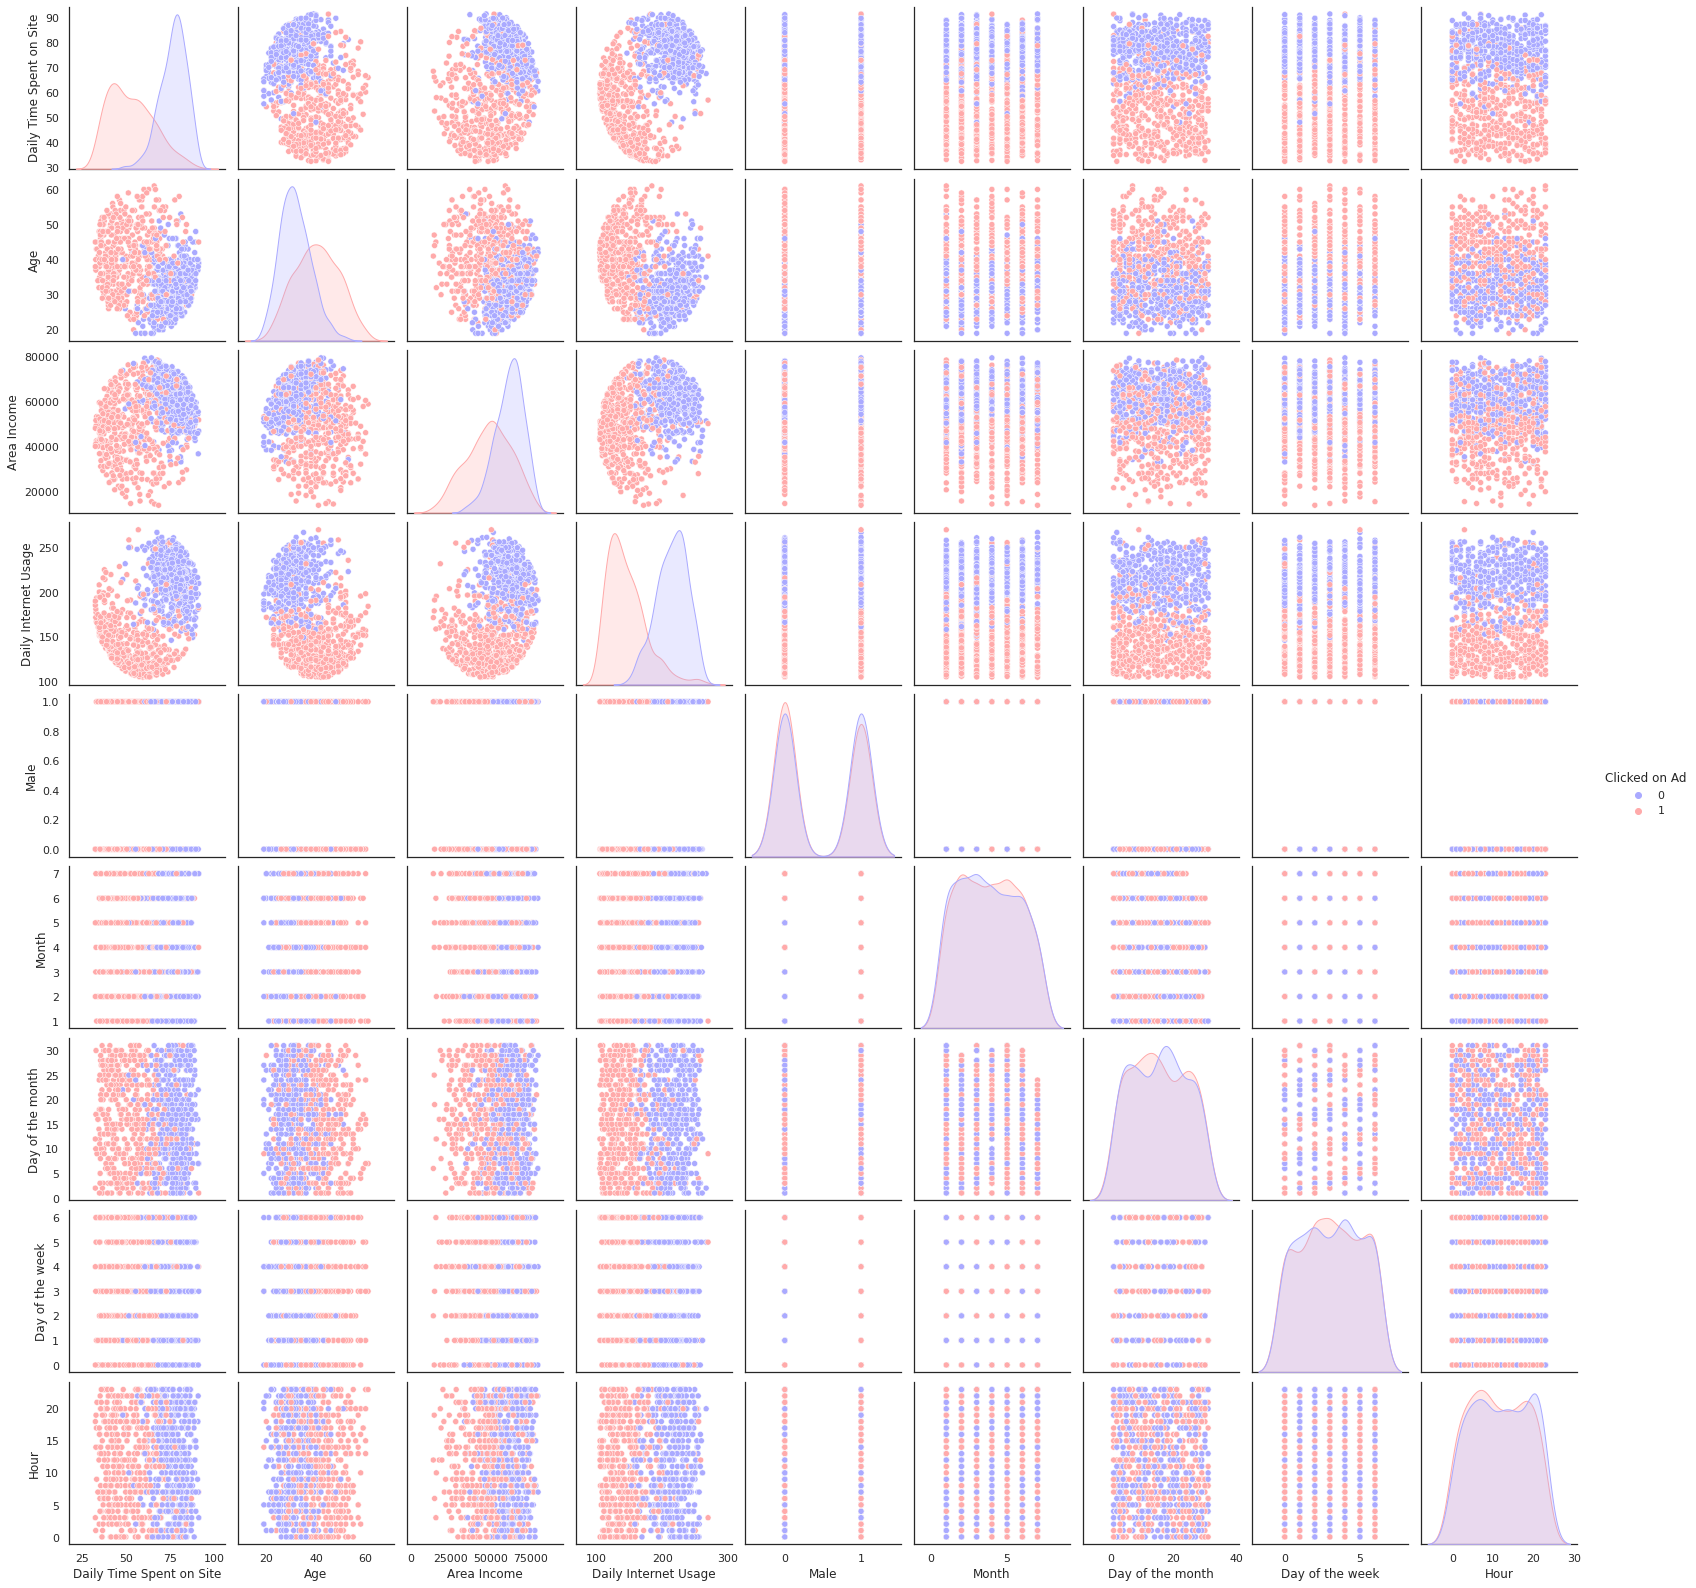

In [ ]:
sns.pairplot(ad, hue='Clicked on Ad', palette='bwr')
plt.show()

We can see that daily less internet usage tends to click on ad more.

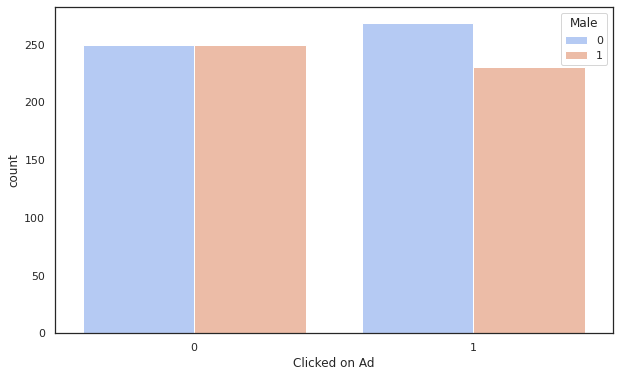

In [ ]:
#Click on Ad features based on Sex
plt.figure(figsize=(10,6))
sns.countplot(x='Clicked on Ad',data=ad,hue='Male',palette='coolwarm')

From this, we can say that females tend to click on ads more as compared to males.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


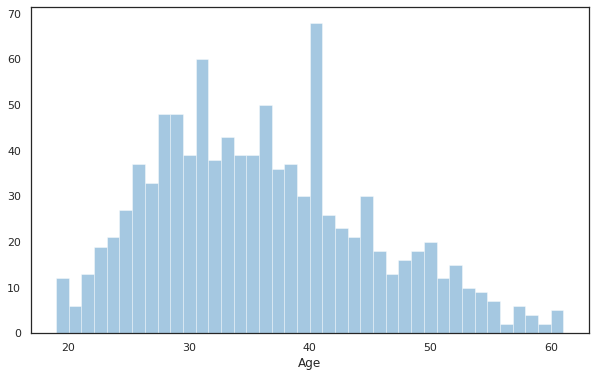

In [ ]:
#Lets see Age distribution
plt.figure(figsize=(10,6))
sns.distplot(ad['Age'],kde=False,bins=40)

Most people are around 30 years old.

Text(0.5, 1.0, 'Age wise distribution of Ad clicks')

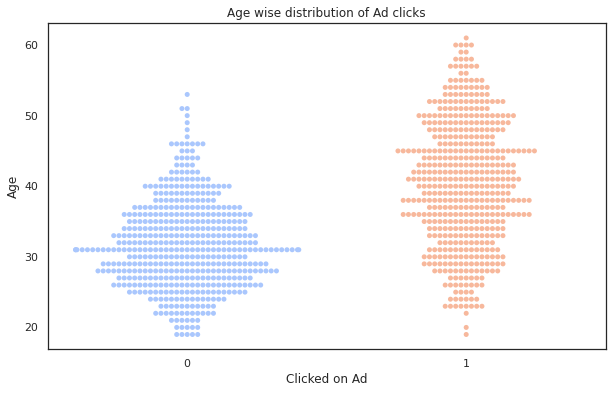

In [ ]:
#Lets see Age distribution
plt.figure(figsize=(10,6))
sns.swarmplot(x=ad['Clicked on Ad'],y= ad['Age'],data=ad,palette='coolwarm')
plt.title('Age wise distribution of Ad clicks')

Around 40 years population is the highest contributor to ad clickings and not around 30 years.

#Logistic Regression

In [ ]:
X = np.array(ad[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']])
y = np.array(ad['Clicked on Ad'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))
print("\n\n\nClassification Report:\n",classification_report(y_test,predictions_LR))

Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[158   4]
 [ 27 141]]



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       162
           1       0.97      0.84      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



#Decision Tree Classifier

In [ ]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))
print("\n\n\nClassification Report:\n",classification_report(y_test,predictions_DT))

Decision tree accuracy: 0.9333333333333333

Confusion matrix:
[[151  11]
 [ 11 157]]



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       162
           1       0.93      0.93      0.93       168

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



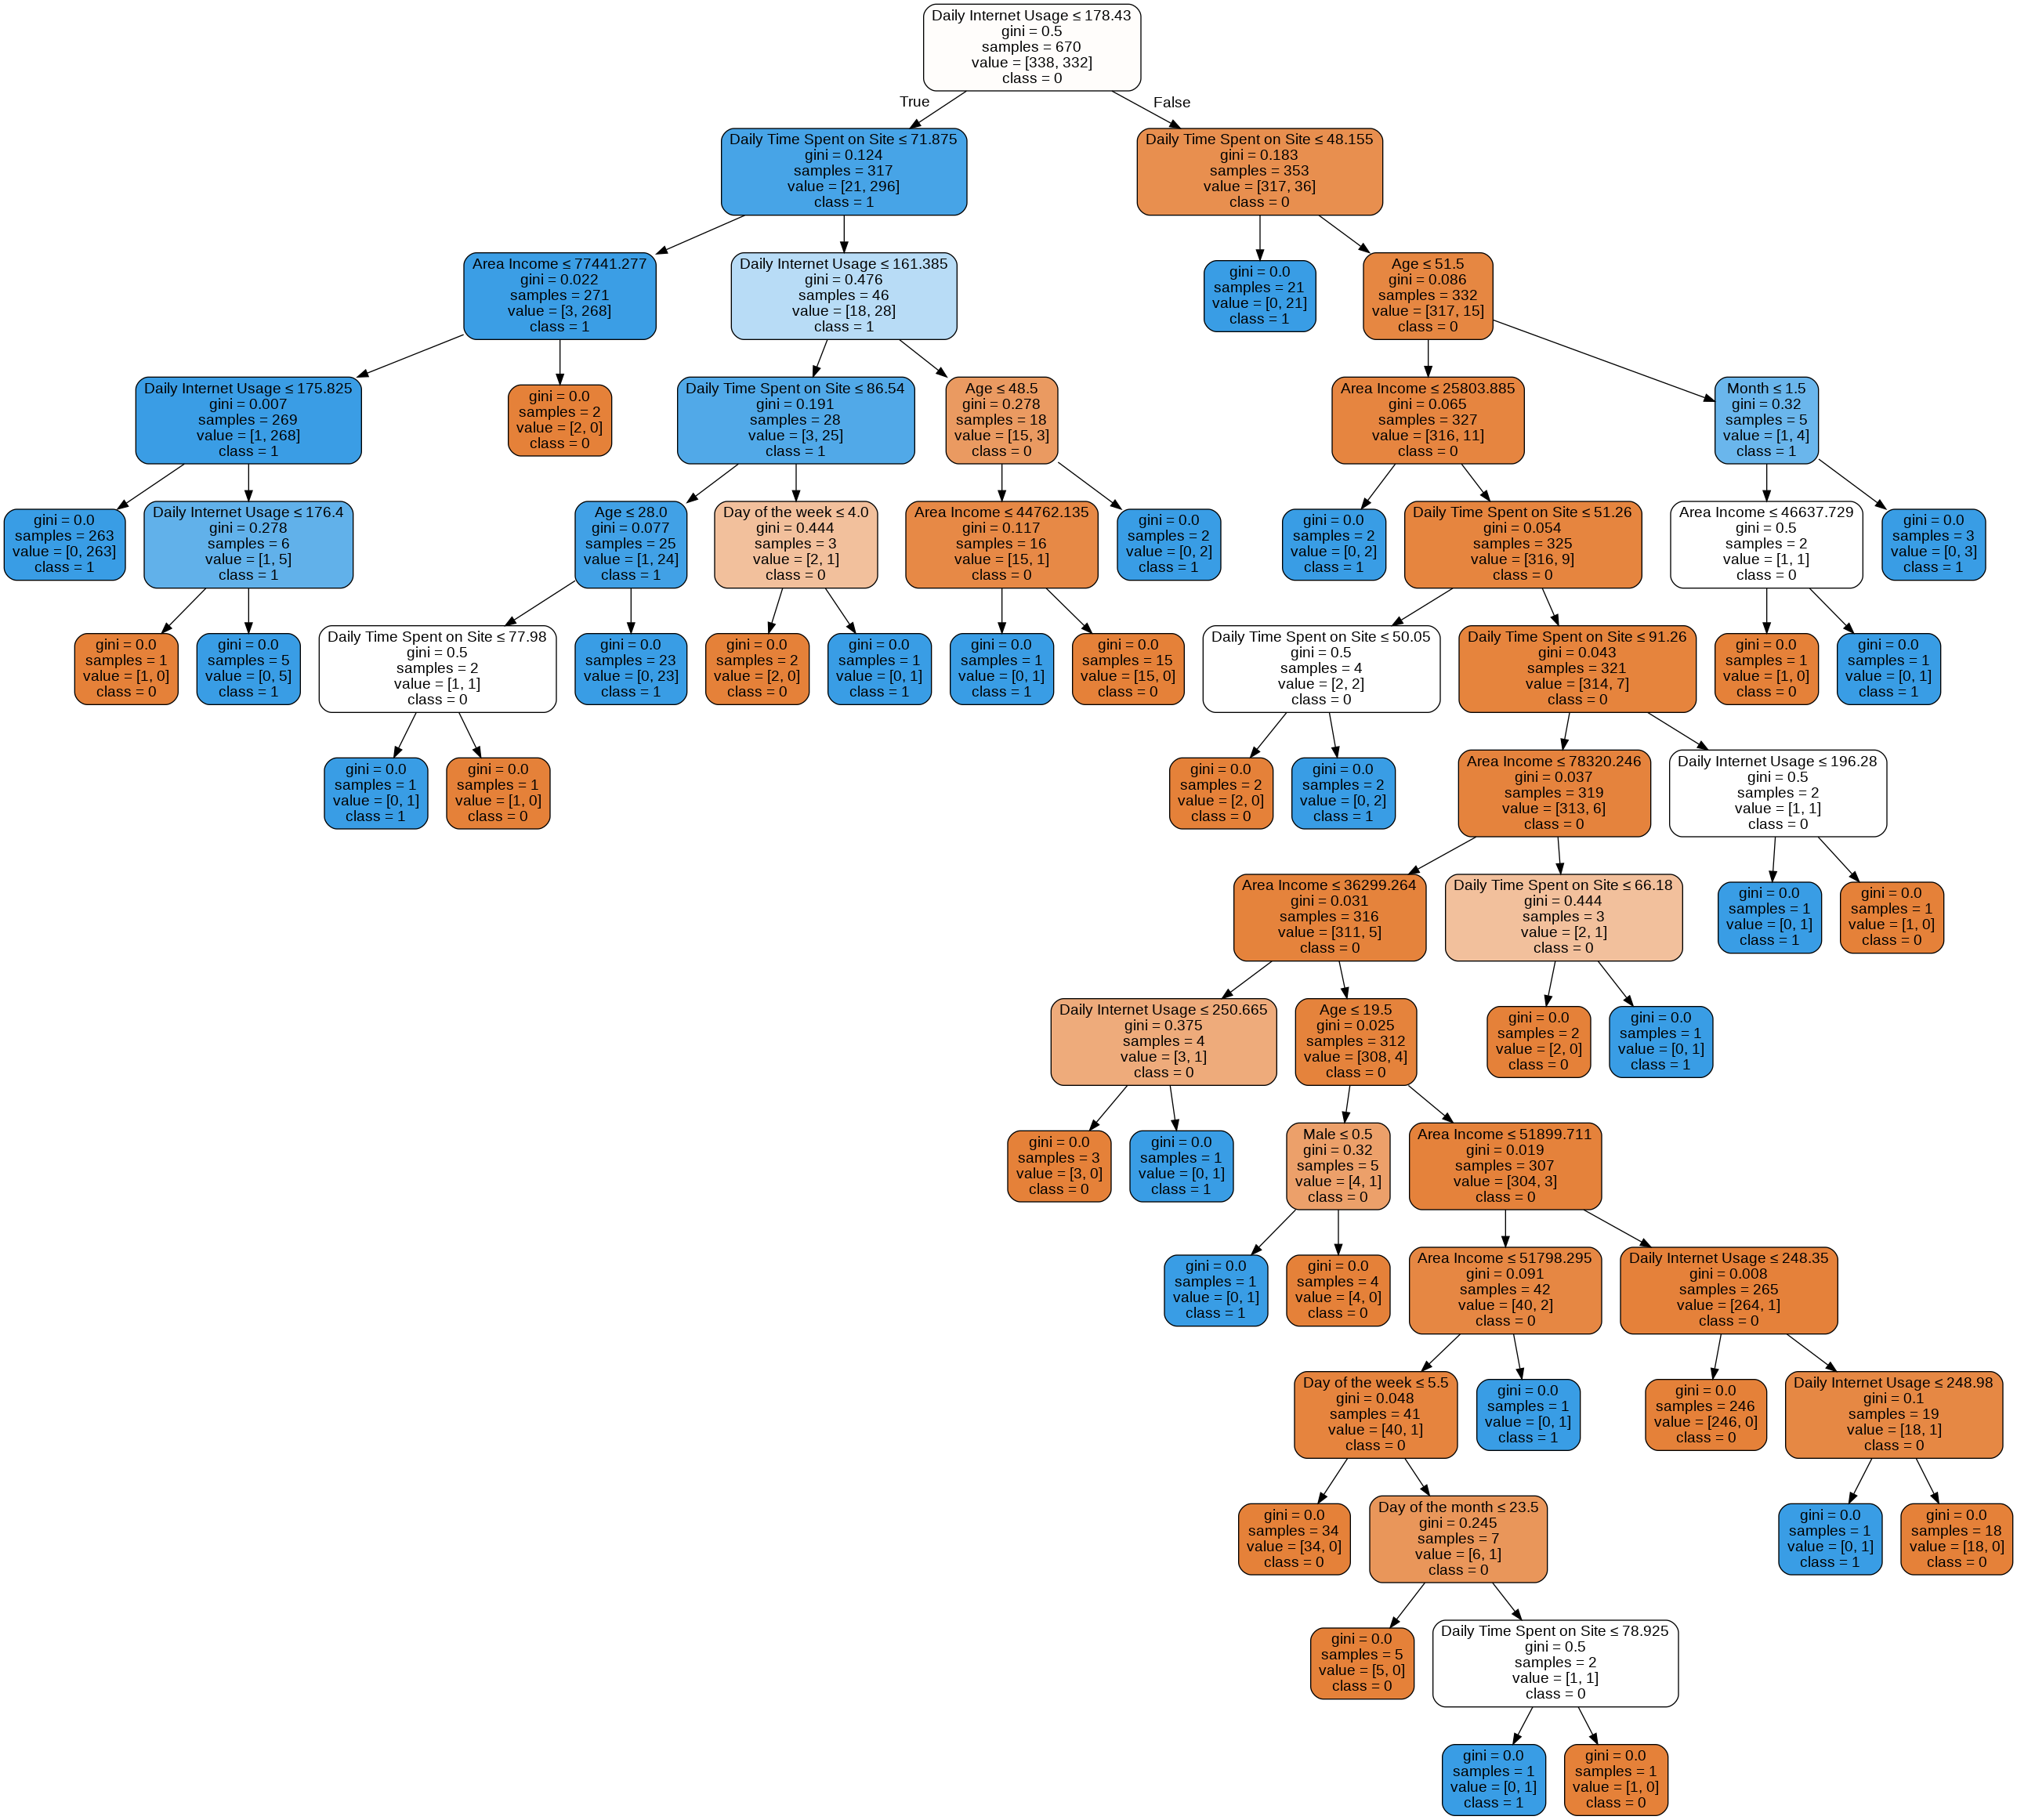

In [ ]:
dot_data = StringIO()
export_graphviz(model_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#Random Forest Classifier

In [ ]:
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rfc= rfc.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,pred_rfc))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,pred_rfc))
print("\n\n\n",classification_report(y_test,pred_rfc))

Accuracy Score: 0.9484848484848485


Confusion Matrix:
 [[155   7]
 [ 10 158]]



               precision    recall  f1-score   support

           0       0.94      0.96      0.95       162
           1       0.96      0.94      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



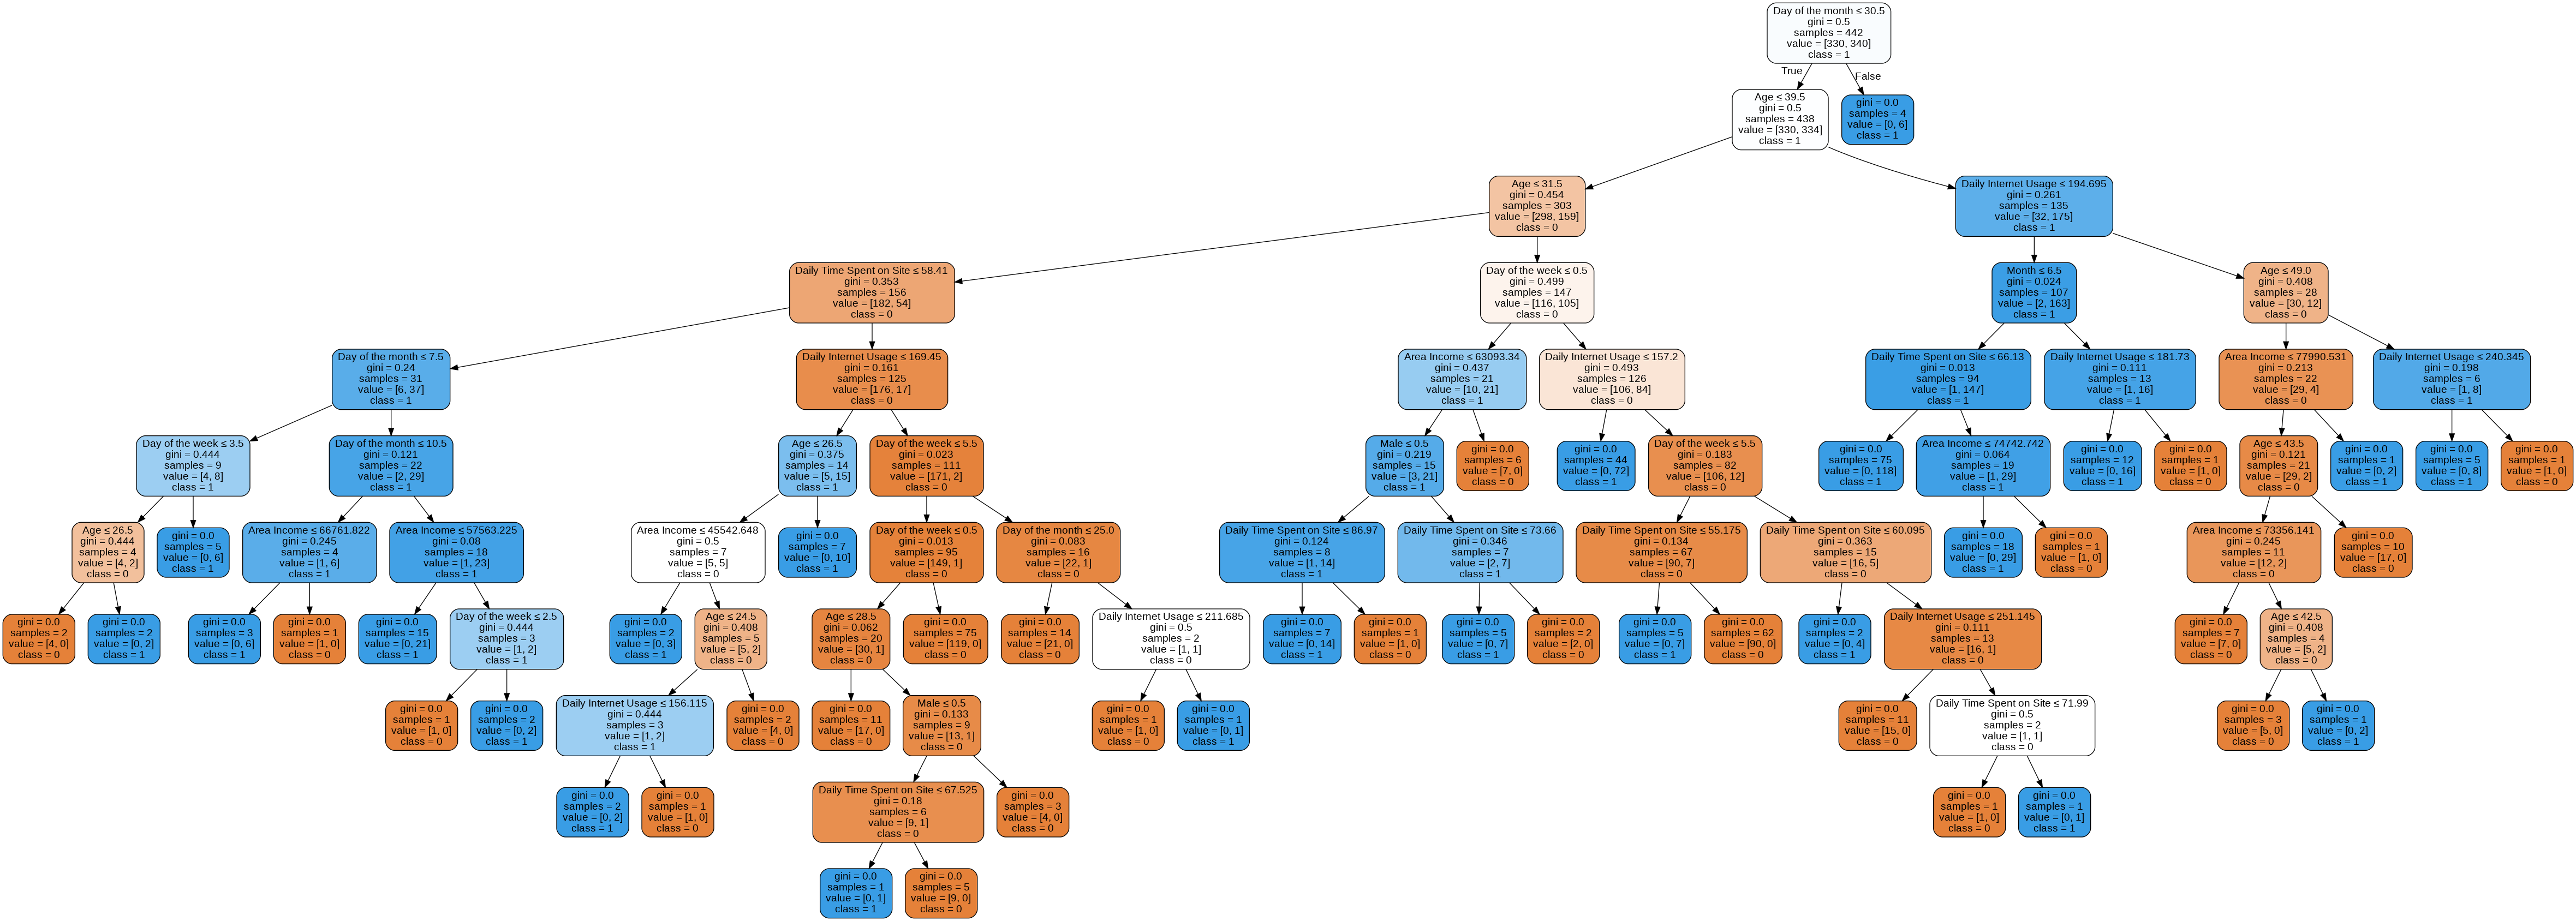

In [ ]:
dot_data = StringIO()
export_graphviz(rfc.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#SVM

###Linear

In [ ]:
clf_linear = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear',probability=True))
clf_linear.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC(gamma='auto',kernel='linear'))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_test_pred_linear=clf_linear.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test,y_test_pred_linear))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,y_test_pred_linear))
print("\n\n\nClassification Report:\n",classification_report(y_test,y_test_pred_linear))

Accuracy: 0.9696969696969697


Confusion Matrix:
 [[159   3]
 [  7 161]]



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



###Polynomial (Degree 3)

In [ ]:
clf_poly = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly',probability=True))
clf_poly.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC(gamma='auto',kernel='poly'))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_test_pred_poly=clf_poly.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test,y_test_pred_poly))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,y_test_pred_poly))
print("\n\n\nClassification Report:\n",classification_report(y_test,y_test_pred_poly))

Accuracy: 0.9393939393939394


Confusion Matrix:
 [[159   3]
 [ 17 151]]



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       162
           1       0.98      0.90      0.94       168

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



###RBF

In [ ]:
clf_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',probability=True))
clf_rbf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC(gamma='auto',kernel='rbf'))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
y_test_pred_rbf=clf_rbf.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test,y_test_pred_rbf))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,y_test_pred_rbf))
print("\n\n\nClassification Report:\n",classification_report(y_test,y_test_pred_rbf))

Accuracy: 0.9515151515151515


Confusion Matrix:
 [[158   4]
 [ 12 156]]



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       162
           1       0.97      0.93      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



#Gaussian Naive Bayes Classification

In [ ]:
gb = GaussianNB()
gb.fit(X_train, y_train)
y_gb_pred=gb.predict(X_test)

In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_gb_pred))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,y_gb_pred))
print("\n\n\n",classification_report(y_test,y_gb_pred))

Accuracy Score: 0.9606060606060606


Confusion Matrix:
 [[156   6]
 [  7 161]]



               precision    recall  f1-score   support

           0       0.96      0.96      0.96       162
           1       0.96      0.96      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



#Voting Classifier

###Soft

In [ ]:
vote= VotingClassifier(estimators=[('logmodel',model_1),('rfc',rfc),('svc',clf_linear),('gnb',gb)],voting='soft')
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('logmodel',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=...
                                        

In [ ]:
pred_vote= vote.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_vote))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,pred_vote))
print("\n\n\nClassification Report:\n",classification_report(y_test,pred_vote))

Accuracy Score:  0.9515151515151515


Confusion Matrix:
 [[156   6]
 [ 10 158]]



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       162
           1       0.96      0.94      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [ ]:
vote= VotingClassifier(estimators=[('logmodel',model_1),('rfc',rfc),('svc',clf_linear),('gnb',gb)],voting='hard')
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('logmodel',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=...
                                        

In [ ]:
pred_vote= vote.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_vote))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,pred_vote))
print("\n\n\nClassification Report:\n",classification_report(y_test,pred_vote))

Accuracy Score:  0.9606060606060606


Confusion Matrix:
 [[158   4]
 [  9 159]]



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       162
           1       0.98      0.95      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



#KNN Classifier

In [ ]:
scaler= StandardScaler()
scaler.fit(ad.drop('Clicked on Ad',axis=1))
scaled_features= scaler.transform(ad.drop('Clicked on Ad',axis=1))

In [ ]:
train_scaled = pd.DataFrame(scaled_features,columns=ad.columns.drop('Clicked on Ad'))
train_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day of the month,Day of the week,Hour
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,-0.424193,1.319174,1.469856,-1.675896
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0.095015,-1.315508,-1.533937,-1.532166
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,-0.424193,-0.284546,1.469856,1.198711
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,-1.462610,-0.628200,1.469856,-1.388436
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,1.133432,-1.430060,0.468592,-1.244705


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_scaled,ad['Clicked on Ad'],test_size=0.20,random_state=101)

In [ ]:
error_rate=[]

for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

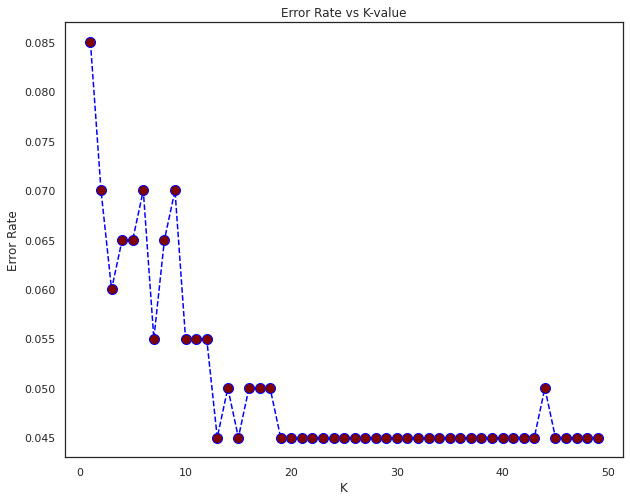

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='maroon',markersize=10)
plt.title('Error Rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn= KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
pred_knn=knn.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,pred_knn))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test,pred_knn))
print("\n\n\nClassification Report:\n",classification_report(y_test,pred_knn))

Accuracy:  0.955


Confusion Matrix:
 [[105   0]
 [  9  86]]



Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       105
           1       1.00      0.91      0.95        95

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

